<a href="https://colab.research.google.com/github/Andersononoja/Hello-World/blob/master/Whatsapp_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [2]:
# Storing the twitter credentials
consumer_key="Your consumer key"
consumer_secret="Your consumer secret"
bearer_token="Your bearer token"
access_token="Your access token"
access_token_secret="Your access token secret"

In [3]:
#create the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
# create the API object
api = tweepy.API(auth)

In [4]:
# Get 2000 tweets about Whatsapp and filter out any retweets 'RT'
search_term = '#whatsapp -filter:retweets'
# Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2021-09-01', tweet_mode= 'extended').items(2000)
# Store the tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [5]:
#create a dataframe to store the dataframe 
df = pd.DataFrame(all_tweets, columns=['Tweets'])
# show the first five row of the data
df.head(5)

,Tweets
0,I'm using #Watusi for iOS by @FouadRaheb to ad...
1,hi friends☺ have you try this?😋 message me wha...
2,WhatsApp has just submitted a new update throu...
3,WhatsApp can Now be used on a couple of device...
4,Whatsapp transfer |how to transfer whatsapp fr...


In [7]:
# Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#whatsapp', 'whatsapp', twt)   # removes the '#' from whatsapp
  twt = re.sub('#Whatsapp', 'Whatsapp', twt)   # removes the '#' from Whatsapp
  twt = re.sub('#[A-Za-z0-9]+', '', twt)       # removes any string with a  '#'
  twt = re.sub('\\n', '', twt)                 # removes anu '\n'string
  twt = re.sub('https?:\/\/\S+', '', twt)      # removes any hyperlink
  return twt

In [8]:
# Clean the tweets and show the first five rows
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
df.head()

,Tweets,Cleaned_Tweets
0,I'm using #Watusi for iOS by @FouadRaheb to ad...,I'm using for iOS by @FouadRaheb to add new f...
1,hi friends☺ have you try this?😋 message me wha...,hi friends☺ have you try this?😋 message me wha...
2,WhatsApp has just submitted a new update throu...,WhatsApp has just submitted a new update throu...
3,WhatsApp can Now be used on a couple of device...,WhatsApp can Now be used on a couple of device...
4,Whatsapp transfer |how to transfer whatsapp fr...,Whatsapp transfer |how to transfer whatsapp fr...


In [9]:
#Create a ffunction to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
# Create a fucntion to get the Polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two columns called 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

# Show the data preview
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,I'm using #Watusi for iOS by @FouadRaheb to ad...,I'm using for iOS by @FouadRaheb to add new f...,0.454545,0.170455
1,hi friends☺ have you try this?😋 message me wha...,hi friends☺ have you try this?😋 message me wha...,0.400000,0.400000
2,WhatsApp has just submitted a new update throu...,WhatsApp has just submitted a new update throu...,0.454545,0.136364
3,WhatsApp can Now be used on a couple of device...,WhatsApp can Now be used on a couple of device...,0.000000,0.000000
4,Whatsapp transfer |how to transfer whatsapp fr...,Whatsapp transfer |how to transfer whatsapp fr...,0.000000,0.000000


In [10]:
# Create a function to the get the Sentiment of the users as (Positive, Neutral or Negative)
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [11]:
# Create a column to store the user's sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
# Preview the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,I'm using #Watusi for iOS by @FouadRaheb to ad...,I'm using for iOS by @FouadRaheb to add new f...,0.454545,0.170455,Positive
1,hi friends☺ have you try this?😋 message me wha...,hi friends☺ have you try this?😋 message me wha...,0.400000,0.400000,Positive
2,WhatsApp has just submitted a new update throu...,WhatsApp has just submitted a new update throu...,0.454545,0.136364,Positive
3,WhatsApp can Now be used on a couple of device...,WhatsApp can Now be used on a couple of device...,0.000000,0.000000,Neutral
4,Whatsapp transfer |how to transfer whatsapp fr...,Whatsapp transfer |how to transfer whatsapp fr...,0.000000,0.000000,Neutral


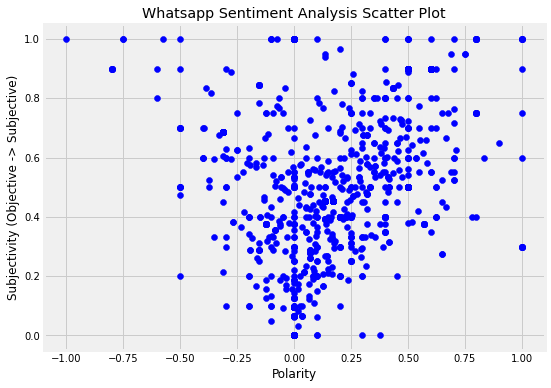

In [12]:
# Create a scatter plot of the Subjectivity and Polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Whatsapp Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (Objective -> Subjective)')
plt.show()

The Scatter plot indicates that the sentiment from twitter users about Whatsapp are mostly positive and subjective. The plot also indicates some neutral sentiments.
The Scatter Plot also indicated that few of the sentiment from twitter users are negatively subjective.

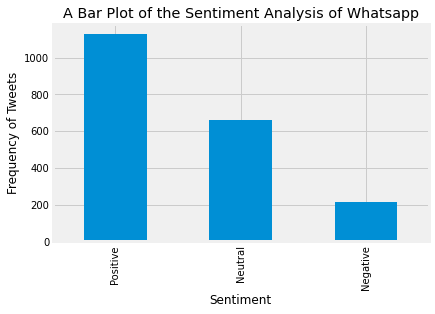

In [14]:
# Create a Bar Chart to show the count of Positive, Neutral, and Negative Sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('A Bar Plot of the Sentiment Analysis of Whatsapp')
plt.xlabel('Sentiment')
plt.ylabel('Frequency of Tweets')
plt.show()

The bar plot indicates that a large number of the tweets as regards Whatsapp are positive. This suggests that users of this social media platform in recent times are very comfortable with Whatsapp's services.
The plot further indicates that a good percentage of the tweets as regards Whatsapp are neutral and about 10% (200 tweets) of the tweets indicated some negative sentiment about Whatsapp which does not seem significant enough to affect the growth of the social media platform.